## Importing Libraries

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Creating columns for Dataframe

In [22]:
prod_name=[]
prices=[]
desc=[]
rev=[]

## Scraping Data from Flipkart

In [23]:
try:
    for i in range(1,4):
        url='https://www.flipkart.com/search?q=mobiles+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='+str(i)
        r=requests.get(url)
        soup=BeautifulSoup(r.text,'html.parser')
        import requests
        box=soup.find('div',class_='_1YokD2 _3Mn1Gg')

        names=box.find_all('div',class_='_4rR01T')
        for i in names:
            prod_name.append(i.text)

        pr=box.find_all('div',class_='_30jeq3 _1_WHN1')
        for i in pr:
            prices.append(i.text)

        ds=box.find_all('ul',class_='_1xgFaf')
        for i in ds:
            desc.append(i.text)

        rv=box.find_all('div',class_='_3LWZlK')
        for i in rv:
            rev.append(i.text)


    df=pd.DataFrame({'Product Name':prod_name,'Prices':prices,'Description':desc,'Reviews':rev})
    print(df)
    
except Exception as e:
    print(e)

                                        Product Name   Prices  \
0   MOTOROLA Edge 30 Ultra (Starlight White, 256 GB)  ₹49,999   
1                      APPLE iPhone 12 (Blue, 64 GB)  ₹48,999   
2           OnePlus 11R 5G (Galactic Silver, 256 GB)  ₹43,419   
3                     APPLE iPhone 12 (White, 64 GB)  ₹48,999   
4                     APPLE iPhone 12 (Black, 64 GB)  ₹48,999   
..                                               ...      ...   
67             OnePlus 10R 5G (Forest Green, 256 GB)  ₹35,990   
68                   vivo X80 (Cosmic Black, 128 GB)  ₹54,999   
69                OnePlus 10R (Forest Green, 256 GB)  ₹36,800   
70                    IQOO 9 Pro 5G (Legend, 256 GB)  ₹44,990   
71                       IQOO 9T 5G (LEGEND, 128 GB)  ₹42,717   

                                          Description Reviews  
0   12 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Ful...     4.2  
1   64 GB ROM15.49 cm (6.1 inch) Super Retina XDR ...     4.6  
2   16 GB RAM | 256 GB ROM1

## Displaying Dataframe

In [24]:
df.head(len(df))

,Product Name,Prices,Description,Reviews
0,"MOTOROLA Edge 30 Ultra (Starlight White, 256 GB)","₹49,999",12 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Ful...,4.2
1,"APPLE iPhone 12 (Blue, 64 GB)","₹48,999",64 GB ROM15.49 cm (6.1 inch) Super Retina XDR ...,4.6
2,"OnePlus 11R 5G (Galactic Silver, 256 GB)","₹43,419",16 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Disp...,4.5
3,"APPLE iPhone 12 (White, 64 GB)","₹48,999",64 GB ROM15.49 cm (6.1 inch) Super Retina XDR ...,4.6
4,"APPLE iPhone 12 (Black, 64 GB)","₹48,999",64 GB ROM15.49 cm (6.1 inch) Super Retina XDR ...,4.6
...,...,...,...,...
67,"OnePlus 10R 5G (Forest Green, 256 GB)","₹35,990",12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Disp...,4.2
68,"vivo X80 (Cosmic Black, 128 GB)","₹54,999",8 GB RAM | 128 GB ROM17.22 cm (6.78 inch) Full...,4.5
69,"OnePlus 10R (Forest Green, 256 GB)","₹36,800",12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Disp...,4.1
70,"IQOO 9 Pro 5G (Legend, 256 GB)","₹44,990",8 GB RAM | 256 GB ROM17.22 cm (6.78 inch) Full...,3.7


## Convert Dataframe to csv

In [5]:
df.to_csv('C:/Users/Pravin Kumar Pathak/Desktop/projectds/Flipkart_mobiles_under_50000.csv')

## Convert string form of Prices and Reviews to numeric

In [25]:
df['Prices']=df['Prices'].str.replace('₹','').str.replace(',','')
df['Prices']=pd.to_numeric(df['Prices'])
df['Reviews']=pd.to_numeric(df['Reviews'])

## Fetching Top 25 mobile phones

In [26]:
d=df.sort_values('Reviews',ascending=False).head(25).reset_index()

In [27]:
d.drop('index',axis=1,inplace=True)
d

,Product Name,Prices,Description,Reviews
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",49900,64 GB ROM13.97 cm (5.5 inch) Retina HD Display...,4.6
1,"APPLE iPhone 12 (White, 64 GB)",48999,64 GB ROM15.49 cm (6.1 inch) Super Retina XDR ...,4.6
2,"APPLE iPhone 12 (Black, 64 GB)",48999,64 GB ROM15.49 cm (6.1 inch) Super Retina XDR ...,4.6
3,"APPLE iPhone 12 (Green, 64 GB)",48999,64 GB ROM15.49 cm (6.1 inch) Super Retina XDR ...,4.6
4,"APPLE iPhone 12 (Purple, 64 GB)",48999,64 GB ROM15.49 cm (6.1 inch) Super Retina XDR ...,4.6
5,"APPLE iPhone 8 Plus (Silver, 64 GB)",49900,64 GB ROM13.97 cm (5.5 inch) Retina HD Display...,4.6
6,"APPLE iPhone 12 (Blue, 64 GB)",48999,64 GB ROM15.49 cm (6.1 inch) Super Retina XDR ...,4.6
7,"APPLE iPhone 8 Plus (Space Grey, 64 GB)",49900,64 GB ROM13.97 cm (5.5 inch) Retina HD Display...,4.6
8,"APPLE iPhone 11 (White, 128 GB)",40999,128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...,4.6
9,"OnePlus 11R 5G (Sonic Black, 256 GB)",44498,16 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Disp...,4.5


## Plotting Data

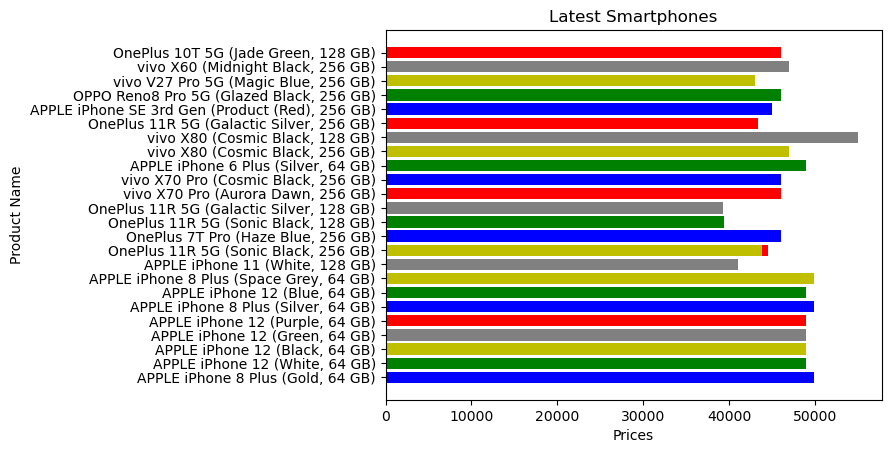

In [37]:
from matplotlib import pyplot as plt
plt.barh(d['Product Name'],d['Prices'],color=['b','g','y','grey','r'])
plt.title('Latest Smartphones')
plt.xlabel('Prices')
plt.ylabel('Product Name')
plt.show()

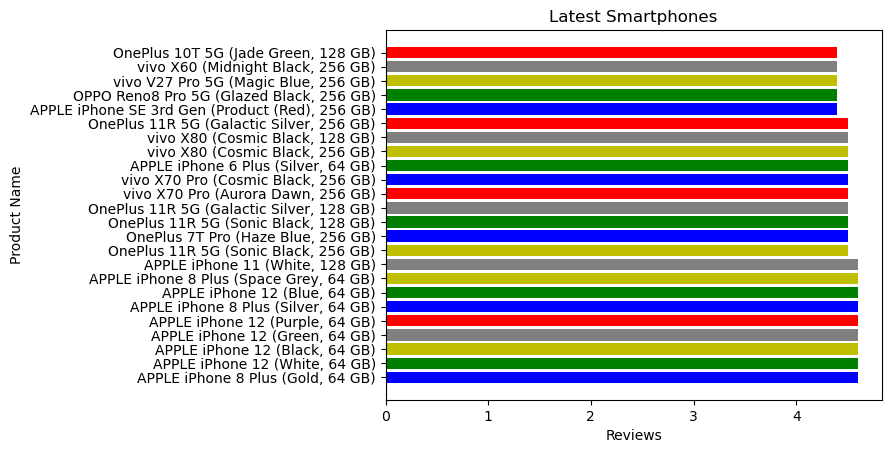

In [38]:
from matplotlib import pyplot as plt
plt.barh(d['Product Name'],d['Reviews'],color=['b','g','y','grey','r'])
plt.title('Latest Smartphones')
plt.xlabel('Reviews')
plt.ylabel('Product Name')
plt.show()